# This script calculates wind speed 

## First import data

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean
%matplotlib inline

In [16]:
data=xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaSurfaceAtmosphereFieldsV1")

In [17]:
data

<xarray.Dataset>
Dimensions:    (gridX: 256, gridY: 266, time: 37824)
Coordinates:
  * time       (time) datetime64[ns] 2014-09-12 ... 2019-01-04T23:00:00
  * gridY      (gridY) float64 0.0 2.5e+03 5e+03 ... 6.575e+05 6.6e+05 6.625e+05
  * gridX      (gridX) float64 0.0 2.5e+03 5e+03 ... 6.35e+05 6.375e+05
Data variables:
    atmpres    (time, gridY, gridX) float32 ...
    precip     (time, gridY, gridX) float32 ...
    qair       (time, gridY, gridX) float32 ...
    solar      (time, gridY, gridX) float32 ...
    tair       (time, gridY, gridX) float32 ...
    therm_rad  (time, gridY, gridX) float32 ...
    u_wind     (time, gridY, gridX) float32 ...
    v_wind     (time, gridY, gridX) float32 ...
Attributes:
    acknowledgement:           MEOPAR, ONC, Compute Canada, Environment Canada
    cdm_data_type:             Grid
    Conventions:               CF-1.6, COARDS, ACDD-1.3
    coverage_content_type:     modelResult
    creator_email:             sallen@eos.ubc.ca
    creator_name:

## calculate wind speed at first time step

In [19]:
time0_u = data.u_wind.isel(time=0)
time0_v = data.v_wind.isel(time=0)

In [20]:
mag_0 = (time0_v**2+time0_u**2)**0.5
mag = (time0_v**2+time0_u**2)

In [21]:
mag_0


<xarray.DataArray (gridY: 266, gridX: 256)>
array([[10.524763, 10.552225, 10.573887, ...,  2.526437,  2.556646,  2.75695 ],
       [10.465415, 10.493931, 10.514387, ...,  2.893023,  2.841213,  3.347374],
       [10.431153, 10.446822, 10.459044, ...,  3.277653,  3.210968,  3.963495],
       ...,
       [ 2.751222,  2.753897,  2.757212, ...,  0.857711,  0.938097,  1.119667],
       [ 2.786937,  2.764981,  2.743568, ...,  0.943678,  0.958392,  1.144484],
       [ 2.824021,  2.783273,  2.75501 , ...,  1.006625,  0.922962,  0.980301]],
      dtype=float32)
Coordinates:
    time     datetime64[ns] 2014-09-12
  * gridY    (gridY) float64 0.0 2.5e+03 5e+03 ... 6.575e+05 6.6e+05 6.625e+05
  * gridX    (gridX) float64 0.0 2.5e+03 5e+03 ... 6.325e+05 6.35e+05 6.375e+05

In [22]:
mag

<xarray.DataArray (gridY: 266, gridX: 256)>
array([[110.770645, 111.34946 , 111.80708 , ...,   6.382881,   6.536437,
          7.600771],
       [109.52492 , 110.12258 , 110.55234 , ...,   8.369581,   8.072494,
         11.204916],
       [108.80895 , 109.13609 , 109.39159 , ...,  10.743007,  10.310313,
         15.709297],
       ...,
       [  7.569222,   7.583949,   7.602218, ...,   0.735667,   0.880025,
          1.253654],
       [  7.767016,   7.645119,   7.527167, ...,   0.890528,   0.918516,
          1.309844],
       [  7.975093,   7.746605,   7.590083, ...,   1.013293,   0.851858,
          0.960991]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2014-09-12
  * gridY    (gridY) float64 0.0 2.5e+03 5e+03 ... 6.575e+05 6.6e+05 6.625e+05
  * gridX    (gridX) float64 0.0 2.5e+03 5e+03 ... 6.325e+05 6.35e+05 6.375e+05

## Calculate wind speed for all January times

In [41]:
jan_data_u = data.u_wind.loc[data['time.month'].isin([1])]
jan_data_v = data.v_wind.loc[data['time.month'].isin([1])]

In [40]:
jan_data_u

<xarray.DataArray 'u_wind' (time: 3072, gridY: 266, gridX: 256)>
[209190912 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01 ... 2019-01-04T23:00:00
  * gridY    (gridY) float64 0.0 2.5e+03 5e+03 ... 6.575e+05 6.6e+05 6.625e+05
  * gridX    (gridX) float64 0.0 2.5e+03 5e+03 ... 6.325e+05 6.35e+05 6.375e+05
Attributes:
    _ChunkSizes:  [  1 266 256]
    level:        10 m above ground
    long_name:    U-Component of Wind
    short_name:   UGRD_10maboveground
    units:        m/s

In [42]:
jan_data_v

<xarray.DataArray 'v_wind' (time: 3072, gridY: 266, gridX: 256)>
[209190912 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01 ... 2019-01-04T23:00:00
  * gridY    (gridY) float64 0.0 2.5e+03 5e+03 ... 6.575e+05 6.6e+05 6.625e+05
  * gridX    (gridX) float64 0.0 2.5e+03 5e+03 ... 6.325e+05 6.35e+05 6.375e+05
Attributes:
    _ChunkSizes:  [  1 266 256]
    level:        10 m above ground
    long_name:    V-Component of Wind
    short_name:   VGRD_10maboveground
    units:        m/s

In [45]:
jan_wind_mag = xr.ufuncs.sqrt(jan_data_u**2+jan_data_v**2)

In [46]:
jan_wind_mag

<xarray.DataArray (time: 3072, gridY: 266, gridX: 256)>
array([[[11.002061, 10.994638, ...,  2.160639,  2.043071],
        [11.024364, 11.03135 , ...,  2.169315,  2.162931],
        ...,
        [ 2.271031,  2.294677, ...,  2.876569,  3.625932],
        [ 2.206419,  2.266318, ...,  1.902628,  2.138863]],

       [[10.713838, 10.695386, ...,  2.054711,  2.02482 ],
        [10.711945, 10.685802, ...,  2.190991,  2.039036],
        ...,
        [ 5.417507,  4.869889, ...,  2.720867,  3.736682],
        [ 5.490757,  4.986056, ...,  1.654908,  2.476436]],

       ...,

       [[ 6.261826,  6.279834, ...,  4.679854,  4.562951],
        [ 6.315036,  6.332868, ...,  4.580901,  4.605636],
        ...,
        [ 3.449392,  3.441629, ...,  4.982099,  4.823649],
        [ 3.375956,  3.39799 , ...,  4.79902 ,  4.339069]],

       [[ 5.129848,  5.135276, ...,  4.091238,  3.767347],
        [ 5.236696,  5.237528, ...,  3.620549,  3.793916],
        ...,
        [ 8.454727,  7.44137 , ...,  5.137964, 

In [56]:
mean = jan_wind_mag.mean(dim='time')

Text(0, 0.5, 'Y')

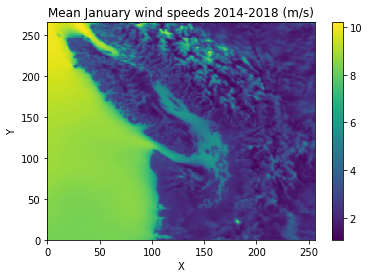

In [67]:
plt.pcolormesh(mean)
plt.colorbar()
plt.title('Mean January wind speeds 2014-2018 (m/s)')
plt.xlabel('X')
plt.ylabel('Y')

In [72]:
speed_cmap = cmocean.cm.speed

Text(0, 0.5, 'Y')

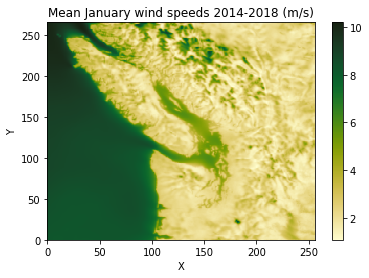

In [82]:
plt.pcolormesh(mean, cmap = speed_cmap)
plt.colorbar()
plt.title('Mean January wind speeds 2014-2018 (m/s)')
plt.xlabel('X')
plt.ylabel('Y')

In [74]:
stddev = jan_wind_mag.std(dim='time')

Text(0, 0.5, 'Y')

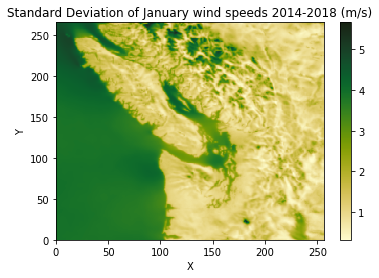

In [76]:
plt.pcolormesh(stddev, cmap = speed_cmap)
plt.colorbar()
plt.title('Standard Deviation of January wind speeds 2014-2018 (m/s)')
plt.xlabel('X')
plt.ylabel('Y')

In [78]:
maxes = jan_wind_mag.max(dim='time')

Text(0, 0.5, 'Y')

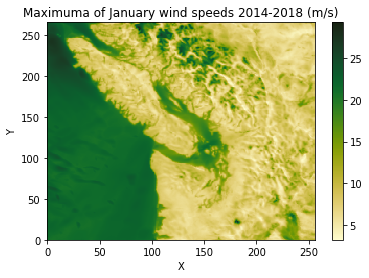

In [79]:
plt.pcolormesh(maxes, cmap = speed_cmap)
plt.colorbar()
plt.title('Maximuma of January wind speeds 2014-2018 (m/s)')
plt.xlabel('X')
plt.ylabel('Y')